# Quantium Data Analytics Virtual Experience

## Task 1: Data Preparation and Customer Analytics

### Background

Quantium has had a data partnership with a large supermarket brand for the last few years who provide transactional and customer data. You are an analyst within the Quantium analytics team and are responsible for delivering highly valued data analytics and insights to help the business make strategic decisions.

Supermarkets will regularly change their store layouts, product selections, prices and promotions. This is to satisfy their customer’s changing needs and preferences, keep up with the increasing competition in the market or to capitalise on new opportunities. The Quantium analytics team are engaged in these processes to evaluate and analyse the performance of change and recommend whether it has been successful.

In this program you will learn key analytics skills such as:

- Data wrangling
- Data visualization
- Programming skills
- Statistics
- Critical thinking
- Commercial thinking

### Task Description

You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region. <br>
The insights from your analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.

### Load Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load purchase data
purch_data = pd.read_csv('data/QVI_purchase_behaviour.csv')

# load transaction data
transaction_data = pd.read_excel('data/QVI_transaction_data.xlsx')

In [3]:
purch_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
purch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


### Data Cleaning and Preparation

The date column in *transaction_data* is in integer form. Let's change this to a proper date format.

In [7]:
import datetime as dt
transaction_data['DATE'] = pd.TimedeltaIndex(transaction_data['DATE'], 
                                             unit = 'd') + dt.datetime(1899, 12, 30)

In [8]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [9]:
# find the total types of products sold

unique_prod = transaction_data['PROD_NAME'].unique()
print(len(unique_prod))

114


In [10]:
transaction_data['PROD_NAME'].head()

0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S/Cream&Onion 175g
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
Name: PROD_NAME, dtype: object

The product names contains special characters and is merged together with the packaging size. Let's clean and split them up.

In [11]:
# import regex module

import re

# remove special characters
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].str.replace(r'[^\w]', ' ')

# split packaging size
transaction_data['PROD_NAME_SPLIT'] = transaction_data['PROD_NAME'].apply(
    lambda x: re.split('(\d+)', x))

In [12]:
transaction_data['PROD_NAME_SPLIT'].head()

0      [Natural Chip        Compny SeaSalt, 175, g]
1                    [CCs Nacho Cheese    , 175, g]
2      [Smiths Crinkle Cut  Chips Chicken , 170, g]
3      [Smiths Chip Thinly  S Cream Onion , 175, g]
4    [Kettle Tortilla ChpsHny Jlpno Chili , 150, g]
Name: PROD_NAME_SPLIT, dtype: object

In [13]:
# split the product name into a list of strings

for i in range(len(transaction_data['PROD_NAME_SPLIT'])):
    item = transaction_data['PROD_NAME_SPLIT'][i]
    item[0] = item[0].split()

In [14]:
# extract packaging size and store it in another column
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME_SPLIT'].str[1].astype('float')

# extract cleaned product names
transaction_data['PROD_NAME_SPLIT'] = transaction_data['PROD_NAME_SPLIT'].str[0]

In [15]:
transaction_data['PACK_SIZE'].head()

0    175.0
1    175.0
2    170.0
3    175.0
4    150.0
Name: PACK_SIZE, dtype: float64

In [16]:
transaction_data['PROD_NAME_SPLIT'].head()

0             [Natural, Chip, Compny, SeaSalt]
1                         [CCs, Nacho, Cheese]
2       [Smiths, Crinkle, Cut, Chips, Chicken]
3      [Smiths, Chip, Thinly, S, Cream, Onion]
4    [Kettle, Tortilla, ChpsHny, Jlpno, Chili]
Name: PROD_NAME_SPLIT, dtype: object

In [17]:
# finding most common words

# initialising
word_counts = {}

def count_words(line):
    for word in line:
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1
            
transaction_data['PROD_NAME_SPLIT'].apply(lambda line: count_words(line))

print(pd.Series(word_counts).sort_values(ascending = False))

Chips       49770
Kettle      41288
Smiths      28860
Cheese      27890
Pringles    25102
            ...  
Whlegrn      1432
Pc           1431
NCC          1419
Garden       1419
Fries        1418
Length: 197, dtype: int64


Not suprisingly, chips is the most common word!

In [18]:
# removing salsa products from our list

transaction_data[
                'PROD_NAME_SPLIT'] = transaction_data[
                'PROD_NAME_SPLIT'][~transaction_data[
                'PROD_NAME_SPLIT'].str.contains("r'[Ss]alsa'", na = False)]

In [19]:
# checking total transactions after removing salsa products

print(len(transaction_data['PROD_NAME_SPLIT']))

264836


It seems like there were no salsa products in the list in the first place as the number of transactions is still the same. We can do another check to confirm this.

In [20]:
# split the product name into individual columns

test_salsa = pd.DataFrame(transaction_data['PROD_NAME_SPLIT'].tolist(), 
                          index = transaction_data.index)

In [21]:
test_salsa.head()

,0,1,2,3,4,5,6,7
0,Natural,Chip,Compny,SeaSalt,None,None,None,None
1,CCs,Nacho,Cheese,None,None,None,None,None
2,Smiths,Crinkle,Cut,Chips,Chicken,None,None,None
3,Smiths,Chip,Thinly,S,Cream,Onion,None,None
4,Kettle,Tortilla,ChpsHny,Jlpno,Chili,None,None,None


In [22]:
# check for salsa products

for i in range(8):
    salsa_count = test_salsa[i].str.contains("r'[Ss]alsa'").sum()
    
    if salsa_count > 0:    
        print('There are salsa products in the list.')
        
    else:
        print('There are no salsa products in the list.')

There are no salsa products in the list.
There are no salsa products in the list.
There are no salsa products in the list.
There are no salsa products in the list.
There are no salsa products in the list.
There are no salsa products in the list.
There are no salsa products in the list.
There are no salsa products in the list.


Now we can confirm there were no salsa products in the original list!

In [23]:
# statistical summary of transaction_data

transaction_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200,182.427004
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226,64.327196
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000,150.000000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000,170.000000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000,175.000000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000


It seems that there is likely an outlier as the max value for PROD_QTY is 200 while its median is 2. Let's look at the purchases made by this customer.

In [24]:
# extracting transactions where PROD_QTY is 200

transaction_data[transaction_data['PROD_QTY'] == 200].copy()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_SPLIT,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,"[Dorito, Corn, Chp, Supreme]",380.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,"[Dorito, Corn, Chp, Supreme]",380.0


There were only 2 transactions with PROD_QTY of 200 and it was made my the same customer (LYLTY_CARD_NBR: 226000). Let's see if this customer made other purchases.

In [25]:
# extracting transactions where made by LYLTY_CARD_NBR: 226000

transaction_data[transaction_data['LYLTY_CARD_NBR'] == 226000].copy()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_SPLIT,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,"[Dorito, Corn, Chp, Supreme]",380.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,"[Dorito, Corn, Chp, Supreme]",380.0


As this customer only made 2 purchases and both of them with PROD_QTY of 200, we can conclude that this is an outlier (not an ordinary customer) and remove them from our list.

In [26]:
# removing transactions made by LYLTY_CARD_NBR: 226000

transaction_data.drop(transaction_data[transaction_data['LYLTY_CARD_NBR'] == 226000].index, 
                      inplace = True)

In [27]:
# check the resulting dataset shape

transaction_data.shape

(264834, 10)

In [28]:
# number of transactions made per day

transaction_data.groupby('DATE')['TXN_ID'].count()

DATE
2018-07-01    724
2018-07-02    711
2018-07-03    722
2018-07-04    714
2018-07-05    712
             ... 
2019-06-26    723
2019-06-27    709
2019-06-28    730
2019-06-29    745
2019-06-30    744
Name: TXN_ID, Length: 364, dtype: int64

The data is for 1 year from 01-Jul-2018 to 30-Jun-2019. <br>
We only have 364 days, meaning that 1 day is missing. Let's find out the missing date.

In [29]:
# find missing date

pd.date_range(start = transaction_data['DATE'].min(), 
              end = transaction_data['DATE'].max()).difference(transaction_data['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

2018-12-25 is missing!

In [30]:
# create a complete date array

corrected_date = pd.merge(pd.Series(pd.date_range(start = transaction_data['DATE'].min(), 
                                                  end = transaction_data['DATE'].max()), 
                                                  name = 'DATE'), 
                                                  transaction_data, 
                                                  on = 'DATE', 
                                                  how = 'left')

In [31]:
# number of transactions made per day

transaction_counts = corrected_date.groupby('DATE')['TXN_ID'].count()
transaction_counts

DATE
2018-07-01    724
2018-07-02    711
2018-07-03    722
2018-07-04    714
2018-07-05    712
             ... 
2019-06-26    723
2019-06-27    709
2019-06-28    730
2019-06-29    745
2019-06-30    744
Name: TXN_ID, Length: 365, dtype: int64

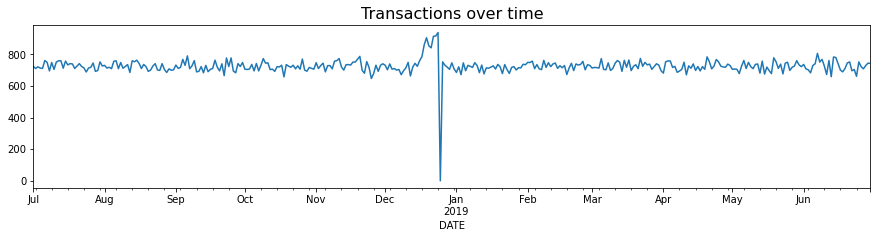

In [32]:
# plot daily transactions over time

transaction_counts.plot(figsize = (15,3))
plt.title('Transactions over time', fontsize = 16)
plt.savefig('charts/Transactions over time.png', bbox_inches = 'tight')

There is a sharp drop towards the end of Dec-2018, let's zoom in on this. 

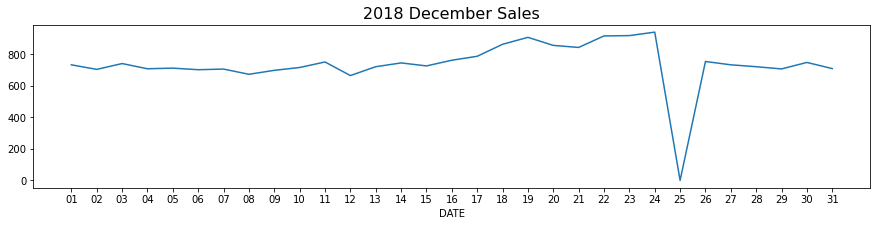

In [33]:
# extract december-2018 sales

dec = transaction_counts[
    (transaction_counts.index >= pd.datetime(2018,12,1)) & 
    (transaction_counts.index < pd.datetime(2019,1,1))].sort_index()

dec.index = dec.index.strftime('%d')

ax = dec.plot(figsize = (15,3))
ax.set_xticks(np.arange(len(dec)))
ax.set_xticklabels(dec.index)

plt.title('2018 December Sales', fontsize = 16)
plt.savefig('charts/2018 December Sales.png', bbox_inches = 'tight')
plt.show()

There were zero sales on 25-Dec-2018 as shops were closed on Christmas.

In [34]:
# check for null values for packaging size

transaction_data['PACK_SIZE'].isnull().values.any()

False

In [35]:
transaction_data['PACK_SIZE'].value_counts()

175.0    66390
150.0    43131
134.0    25102
110.0    22387
170.0    19983
165.0    15297
300.0    15166
330.0    12540
380.0     6416
270.0     6285
210.0     6272
200.0     4473
135.0     3257
250.0     3169
90.0      3008
190.0     2995
160.0     2970
220.0     1564
70.0      1507
180.0     1468
125.0     1454
Name: PACK_SIZE, dtype: int64

Largest packaging size is 380g and smallest is 70g. 175g and 150g are the most popular.

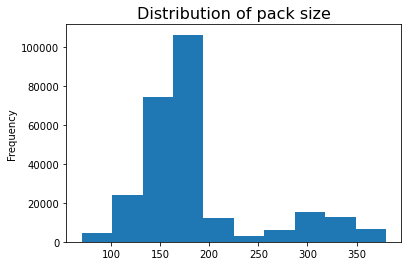

In [36]:
# plot distribution of packaging size

transaction_data['PACK_SIZE'].plot.hist()
plt.title('Distribution of pack size', fontsize = 16)

plt.savefig('charts/Distribution of pack size.png', bbox_inches = 'tight')

In [37]:
# extract the brand names, which is the first word of the product name

brands = transaction_data['PROD_NAME_SPLIT'].str[0].value_counts().sort_index()
brands

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       24962
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Old            9324
Pringles      25102
RRD           11894
Red            5885
Smith          2963
Smiths        28860
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     4437
Name: PROD_NAME_SPLIT, dtype: int64

There are similar brand names like 'Dorito' and 'Doritos' but are classified differently. Let's clean this up.

#### Similar brand names: <br>
Dorito and Doritos <br>
Grain and GrnWves <br>
Infuzions and Infzna <br>
NCC (Natural Chip Co.) and Natural <br>
RRD (Red Rock Deli) and Red <br>
Smith and Smiths <br>
Snbts and Sunbites <br>
WW and Woolworths

In [38]:
# store brand names in another column

transaction_data['BRANDS'] = transaction_data['PROD_NAME_SPLIT'].str[0]

In [39]:
# function to clean the brand names

def cleaned_brands(df):
    
    brand = df['BRANDS']
    
    if brand == 'Dorito':
        return 'Doritos'
    
    elif brand == 'GrnWves' or brand == 'Grain':
        return 'Grain Waves'
    
    elif brand == 'Infzns':
        return 'Infuzions'
    
    elif brand == 'Natural' or brand == 'NCC':
        return 'Natural Chip Co'
    
    elif brand == 'Red':
        return 'RRD'
    
    elif brand == 'Smith':
        return 'Smiths'
    
    elif brand == 'Snbts':
        return 'Sunbites'
    
    elif brand == 'WW':
        return 'Woolworths'
    
    else:
        return brand

In [40]:
# apply cleaned_brands functions

transaction_data["BRANDS"] = transaction_data.apply(lambda x: cleaned_brands(x), axis = 1)

In [41]:
transaction_data['BRANDS'].value_counts()

Kettle             41288
Smiths             31823
Doritos            28145
Pringles           25102
RRD                17779
Woolworths         14757
Infuzions          14201
Thins              14075
Cobs                9693
Tostitos            9471
Twisties            9454
Old                 9324
Grain Waves         7740
Natural Chip Co     7469
Tyrrells            6442
Cheezels            4603
CCs                 4551
Sunbites            3008
Cheetos             2927
Burger              1564
French              1418
Name: BRANDS, dtype: int64

The brand names looks better now!

Now that we are happy with the transaction dataset, let’s have a look at the customer dataset.

In [42]:
purch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [43]:
purch_data['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

Customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school.

In [44]:
purch_data['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options.

As there do not seem to be any issues with the customer data, we can now go ahead and join the transaction and customer data sets together

In [45]:
# join purch_data and transaction_data based on the LYLTY_CARD_NBR

merged_data = pd.merge(purch_data, transaction_data, on = 'LYLTY_CARD_NBR', how = 'right')
merged_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_SPLIT,PACK_SIZE,BRANDS
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,"[Natural, Chip, Compny, SeaSalt]",175.0,Natural Chip Co
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn Garlic Aioli 150g,1,2.7,"[Red, Rock, Deli, Chikn, Garlic, Aioli]",150.0,RRD
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream Chives 210G,1,3.6,"[Grain, Waves, Sour, Cream, Chives]",210.0,Grain Waves
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,"[Natural, ChipCo, Hony, Soy, Chckn]",175.0,Natural Chip Co
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,"[WW, Original, Stacked, Chips]",160.0,Woolworths


In [46]:
merged_data.shape

(264834, 13)

In [47]:
# check for null values

merged_data['LIFESTAGE'].isnull().sum()

0

In [48]:
# check for null values

merged_data['PREMIUM_CUSTOMER'].isnull().sum()

0

In [49]:
# save merged dataset to a csv file

merged_data.to_csv('full_customer_data.csv')

### Exploratory Data Analysis

Now that the data is ready for analysis, we can define some metrics of interest to the client:

- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What’s the average chip price by customer segment

We could also ask our data team for more information. Examples are:

- The customer’s total spend over the period and total spend for each transaction to understand what
proportion of their grocery spend is on chips
- Proportion of customers in each customer segment overall to compare against the mix of customers who purchase chips

In [50]:
# total sales by PREMIUM_CUSTOMER

merged_data[['TOT_SALES', 
             'PREMIUM_CUSTOMER']].groupby('PREMIUM_CUSTOMER').sum().sort_values('TOT_SALES', 
                                                                                ascending = False)

,TOT_SALES
PREMIUM_CUSTOMER,
Mainstream,750744.50
Budget,676211.55
Premium,506158.95


In [51]:
# total sales by LIFESTAGE

merged_data[['TOT_SALES', 'LIFESTAGE']].groupby('LIFESTAGE').sum().sort_values('TOT_SALES', ascending = False)

,TOT_SALES
LIFESTAGE,
OLDER SINGLES/COUPLES,402426.75
RETIREES,366470.90
OLDER FAMILIES,352467.20
YOUNG FAMILIES,316160.10
YOUNG SINGLES/COUPLES,260405.30
MIDAGE SINGLES/COUPLES,184751.30
NEW FAMILIES,50433.45


In [52]:
# total sales by LIFESTAGE and PREMIUM_CUSTOMER

sales_breakdown = merged_data[['LIFESTAGE', 
                               'PREMIUM_CUSTOMER', 
                               'TOT_SALES']].groupby(
                                ['PREMIUM_CUSTOMER', 
                                 'LIFESTAGE']).sum().sort_values('TOT_SALES', 
                                                                 ascending = False).reset_index()

sales_breakdown

,PREMIUM_CUSTOMER,LIFESTAGE,TOT_SALES
0,Budget,OLDER FAMILIES,168363.25
1,Mainstream,YOUNG SINGLES/COUPLES,157621.60
2,Mainstream,RETIREES,155677.05
3,Budget,YOUNG FAMILIES,139345.85
4,Budget,OLDER SINGLES/COUPLES,136769.80
5,Mainstream,OLDER SINGLES/COUPLES,133393.80
6,Premium,OLDER SINGLES/COUPLES,132263.15
7,Budget,RETIREES,113147.80
8,Mainstream,OLDER FAMILIES,103445.55
9,Premium,RETIREES,97646.05


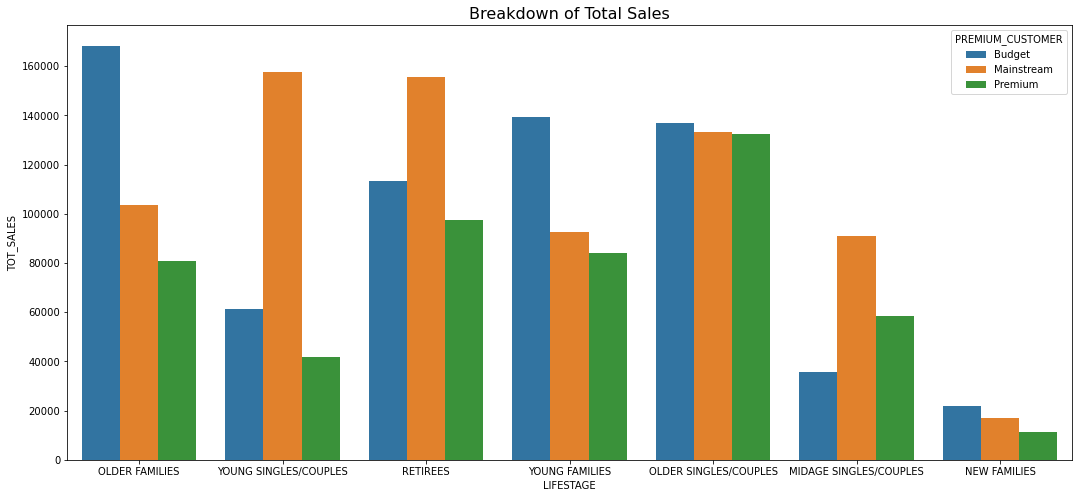

In [53]:
# plot breakdown of total sales by LIFESTAGE and PREMIUM_CUSTOMER

plt.figure(figsize = (18,8))
sns.barplot(y = sales_breakdown['TOT_SALES'], 
            x = sales_breakdown['LIFESTAGE'], 
            hue = sales_breakdown['PREMIUM_CUSTOMER'])

plt.title('Breakdown of Total Sales', fontsize = 16)

plt.savefig('charts/Breakdown of Total Sales.png', bbox_inches = 'tight')

Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees. <br>
Let’s see if the higher sales are due to there being more customers who buy chips.

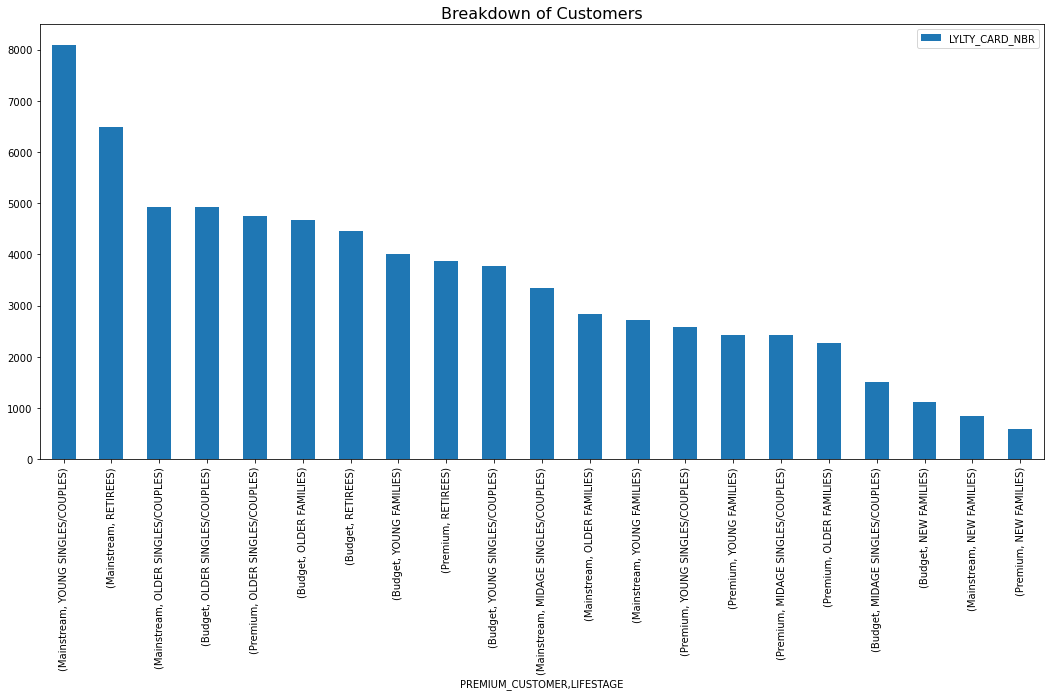

In [54]:
# total customers by LIFESTAGE and PREMIUM_CUSTOMER

purch_data.groupby(['PREMIUM_CUSTOMER', 
                    'LIFESTAGE']).count().sort_values(by = 'LYLTY_CARD_NBR', 
                                                      ascending = False).plot.bar(figsize = (18,8))

plt.title('Breakdown of Customers', fontsize = 16)

plt.savefig('charts/Breakdown of Customers.png', bbox_inches = 'tight')

In [55]:
# total customers by LIFESTAGE and PREMIUM_CUSTOMER

customer_count = purch_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).count().reset_index()
customer_count.columns = ['PREMIUM_CUSTOMER', 'LIFESTAGE', 'CUSTOMER_COUNT']
customer_count.sort_values('CUSTOMER_COUNT', ascending = False)

,PREMIUM_CUSTOMER,LIFESTAGE,CUSTOMER_COUNT
13,Mainstream,YOUNG SINGLES/COUPLES,8088
11,Mainstream,RETIREES,6479
10,Mainstream,OLDER SINGLES/COUPLES,4930
3,Budget,OLDER SINGLES/COUPLES,4929
17,Premium,OLDER SINGLES/COUPLES,4750
2,Budget,OLDER FAMILIES,4675
4,Budget,RETIREES,4454
5,Budget,YOUNG FAMILIES,4017
18,Premium,RETIREES,3872
6,Budget,YOUNG SINGLES/COUPLES,3779


There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.

In [56]:
# join sales_breakdown and customer_count based on LIFESTAGE and PREMIUM_CUSTOMER

sales_overview = pd.merge(sales_breakdown, 
                          customer_count, 
                          on = ['PREMIUM_CUSTOMER', 'LIFESTAGE'], 
                          how = 'right')

In [57]:
sales_overview

,PREMIUM_CUSTOMER,LIFESTAGE,TOT_SALES,CUSTOMER_COUNT
0,Budget,OLDER FAMILIES,168363.25,4675
1,Mainstream,YOUNG SINGLES/COUPLES,157621.60,8088
2,Mainstream,RETIREES,155677.05,6479
3,Budget,YOUNG FAMILIES,139345.85,4017
4,Budget,OLDER SINGLES/COUPLES,136769.80,4929
5,Mainstream,OLDER SINGLES/COUPLES,133393.80,4930
6,Premium,OLDER SINGLES/COUPLES,132263.15,4750
7,Budget,RETIREES,113147.80,4454
8,Mainstream,OLDER FAMILIES,103445.55,2831
9,Premium,RETIREES,97646.05,3872


In [58]:
# total transactions by LIFESTAGE and PREMIUM_CUSTOMER

transaction_counts = merged_data[['LIFESTAGE', 
                                  'PREMIUM_CUSTOMER', 
                                  'PROD_QTY']].groupby(
                                              ['PREMIUM_CUSTOMER', 
                                               'LIFESTAGE']).sum().sort_values('PROD_QTY', 
                                                                               ascending = False).reset_index()

transaction_counts.columns = ['PREMIUM_CUSTOMER','LIFESTAGE','TOTAL_PROD_QTY']

In [59]:
transaction_counts.head()

,PREMIUM_CUSTOMER,LIFESTAGE,TOTAL_PROD_QTY
0,Budget,OLDER FAMILIES,45065
1,Mainstream,RETIREES,40518
2,Mainstream,YOUNG SINGLES/COUPLES,38632
3,Budget,YOUNG FAMILIES,37111
4,Budget,OLDER SINGLES/COUPLES,35220


In [60]:
# join transaction_counts to sales_overview

sales_overview = pd.merge(sales_overview, 
                          transaction_counts, 
                          left_on = ['LIFESTAGE', 'PREMIUM_CUSTOMER'], 
                          right_on = ['LIFESTAGE', 'PREMIUM_CUSTOMER'], 
                          how = 'left')

In [61]:
sales_overview

,PREMIUM_CUSTOMER,LIFESTAGE,TOT_SALES,CUSTOMER_COUNT,TOTAL_PROD_QTY
0,Budget,OLDER FAMILIES,168363.25,4675,45065
1,Mainstream,YOUNG SINGLES/COUPLES,157621.60,8088,38632
2,Mainstream,RETIREES,155677.05,6479,40518
3,Budget,YOUNG FAMILIES,139345.85,4017,37111
4,Budget,OLDER SINGLES/COUPLES,136769.80,4929,35220
5,Mainstream,OLDER SINGLES/COUPLES,133393.80,4930,34997
6,Premium,OLDER SINGLES/COUPLES,132263.15,4750,33986
7,Budget,RETIREES,113147.80,4454,28764
8,Mainstream,OLDER FAMILIES,103445.55,2831,27756
9,Premium,RETIREES,97646.05,3872,24884


Budget - Older Families, despite not having one of the highest customer counts, attributed for the highest total sales. This is due to them buying in large quantities per order. <br>
New Families are the lowest sales contributor as they make up the smallest group of customers. <br>
Higher sales may also be driven by more units of chips being bought per customer. Let’s have a look at this next.

In [62]:
# average qty sold per customer

sales_overview['AVERAGE_QTY/CUSTOMER'] = sales_overview['TOTAL_PROD_QTY']/sales_overview['CUSTOMER_COUNT']

# sort based on AVERAGE_QTY/CUSTOMER

sales_overview.sort_values('AVERAGE_QTY/CUSTOMER', ascending = False, inplace = True)

In [63]:
sales_overview

,PREMIUM_CUSTOMER,LIFESTAGE,TOT_SALES,CUSTOMER_COUNT,TOTAL_PROD_QTY,AVERAGE_QTY/CUSTOMER
8,Mainstream,OLDER FAMILIES,103445.55,2831,27756,9.804309
0,Budget,OLDER FAMILIES,168363.25,4675,45065,9.639572
13,Premium,OLDER FAMILIES,80658.40,2274,21771,9.573879
3,Budget,YOUNG FAMILIES,139345.85,4017,37111,9.238486
12,Premium,YOUNG FAMILIES,84025.50,2433,22406,9.209207
10,Mainstream,YOUNG FAMILIES,92788.75,2728,25044,9.180352
6,Premium,OLDER SINGLES/COUPLES,132263.15,4750,33986,7.154947
4,Budget,OLDER SINGLES/COUPLES,136769.80,4929,35220,7.145466
5,Mainstream,OLDER SINGLES/COUPLES,133393.80,4930,34997,7.098783
11,Mainstream,MIDAGE SINGLES/COUPLES,90803.85,3340,22699,6.796108


We can see that older and young families tend to buy more chips per customer.

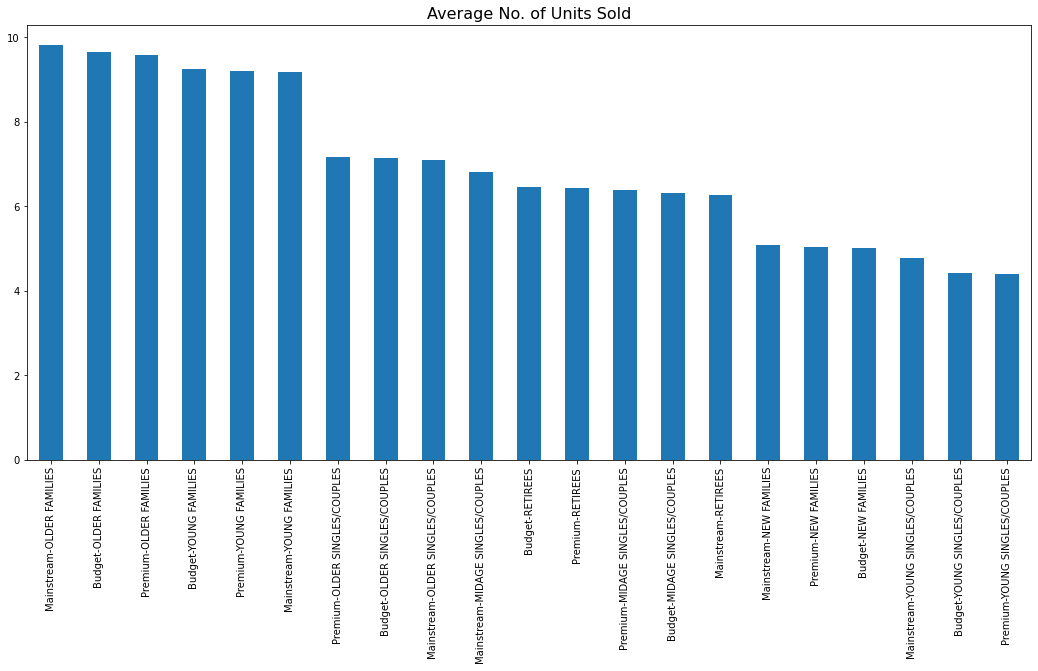

In [64]:
# define xtick labels

xticks = []
for i in sales_overview.index:
    xticks.append(str(sales_overview['PREMIUM_CUSTOMER'][i] + '-' + sales_overview['LIFESTAGE'][i]))

# plot Average No. of Units Sold

sales_overview['AVERAGE_QTY/CUSTOMER'].plot.bar(figsize = (18,8))
plt.title('Average No. of Units Sold', fontsize = 16)

plt.xticks(np.arange(21), xticks);

Let’s also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.

In [65]:
# average price per unit sold

sales_overview['AVERAGE_PRICE/UNIT'] = sales_overview['TOT_SALES']/sales_overview['TOTAL_PROD_QTY']

# sort based on AVERAGE_PRICE/UNIT

sales_overview.sort_values('AVERAGE_PRICE/UNIT', ascending = False, inplace = True)

In [66]:
sales_overview

,PREMIUM_CUSTOMER,LIFESTAGE,TOT_SALES,CUSTOMER_COUNT,TOTAL_PROD_QTY,AVERAGE_QTY/CUSTOMER,AVERAGE_PRICE/UNIT
1,Mainstream,YOUNG SINGLES/COUPLES,157621.60,8088,38632,4.776459,4.080079
11,Mainstream,MIDAGE SINGLES/COUPLES,90803.85,3340,22699,6.796108,4.000346
19,Mainstream,NEW FAMILIES,17013.90,849,4319,5.087161,3.939315
18,Budget,NEW FAMILIES,21928.45,1112,5571,5.009892,3.936178
7,Budget,RETIREES,113147.80,4454,28764,6.458015,3.933660
9,Premium,RETIREES,97646.05,3872,24884,6.426653,3.924050
6,Premium,OLDER SINGLES/COUPLES,132263.15,4750,33986,7.154947,3.891695
20,Premium,NEW FAMILIES,11491.10,588,2957,5.028912,3.886067
4,Budget,OLDER SINGLES/COUPLES,136769.80,4929,35220,7.145466,3.883299
2,Mainstream,RETIREES,155677.05,6479,40518,6.253743,3.842170


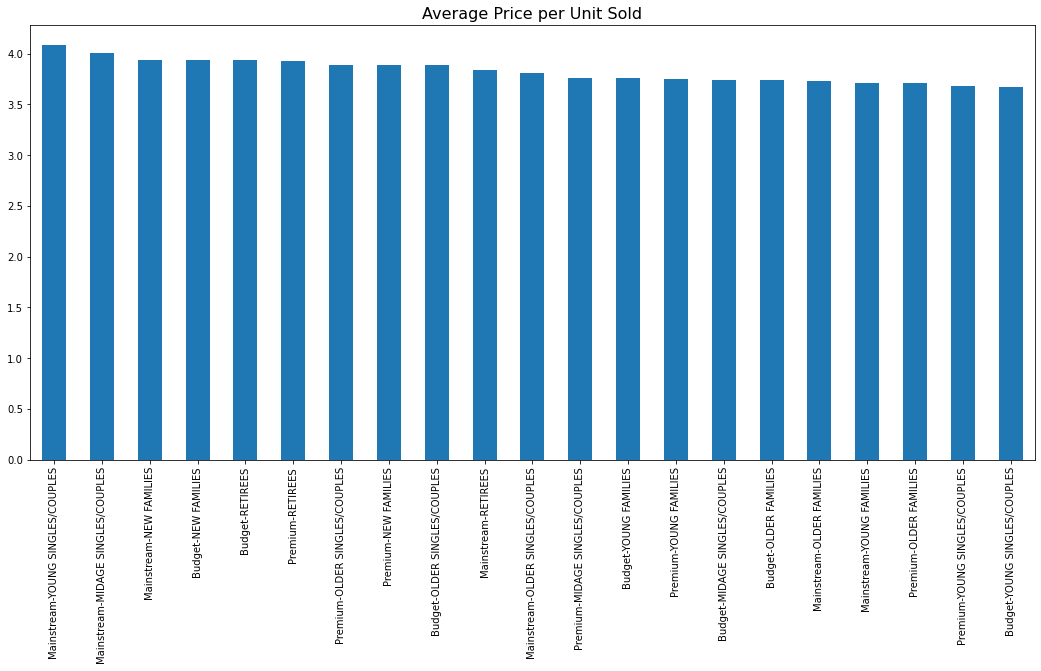

In [67]:
# define xtick labels

xticks = []
for i in sales_overview.index:
    xticks.append(str(sales_overview['PREMIUM_CUSTOMER'][i] + '-' + sales_overview['LIFESTAGE'][i]))

# plot Average Price per Unit Sold'

sales_overview['AVERAGE_PRICE/UNIT'].sort_values(ascending = False).plot.bar(figsize = (18,8))
plt.title('Average Price per Unit Sold', fontsize = 16)

plt.xticks(np.arange(21), xticks);

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

As the difference in average price per unit isn’t large, we can check if this difference is statistically different with a t-test.

We will conduct a t-test between mainstream midage & young singles/couples vs premium or budget midage & young singles/couples based on the average price per unit sold.

- Null hypothesis - There is no significant difference in the average price per unit sold.
- Alternative hypothesis - There is a significant difference in the average price per unit sold.

- Significance level (alpha) - 5%

In [68]:
from scipy.stats import ttest_ind

In [69]:
# create a unit price column
merged_data['UNIT_PRICE'] = merged_data['TOT_SALES'] / merged_data['PROD_QTY']

# extract young and midage singles/couples
young_midage = merged_data[(merged_data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') | (merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')]

# extract mainstream customers from young and midage singles/couples
mainstream_ym = young_midage[young_midage['PREMIUM_CUSTOMER'] == 'Mainstream']

# extractbudget and premium customers from young and midage singles/couples
budget_premium_ym = young_midage[young_midage['PREMIUM_CUSTOMER'] != 'Mainstream']

# run 2 sample t-test
a = mainstream_ym['UNIT_PRICE']
b = budget_premium_ym['UNIT_PRICE']

ttest_ind(a.values, b.values, equal_var = False)

Ttest_indResult(statistic=40.60989476220128, pvalue=0.0)

The t-test results in a p-value of 0.0 (< 0.05), i.e. the unit price for mainstream, young and mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples.

We have found quite a few interesting insights that we can dive deeper into.
We might want to target customer segments that contribute the most to sales to retain them or further
increase sales. Let’s look at Mainstream - young singles/couples. For instance, let’s find out if they tend to buy a particular brand of chips.

In [70]:
# create a 'SEGMENTS' column

merged_data['SEGMENTS'] = merged_data['PREMIUM_CUSTOMER'] + '-' + merged_data['LIFESTAGE']

In [71]:
# create a copy of the merged dataset

merged = merged_data.copy()

In [72]:
merged.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_SPLIT,PACK_SIZE,BRANDS,UNIT_PRICE,SEGMENTS
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,"[Natural, Chip, Compny, SeaSalt]",175.0,Natural Chip Co,3.0,Premium-YOUNG SINGLES/COUPLES
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn Garlic Aioli 150g,1,2.7,"[Red, Rock, Deli, Chikn, Garlic, Aioli]",150.0,RRD,2.7,Mainstream-YOUNG SINGLES/COUPLES
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream Chives 210G,1,3.6,"[Grain, Waves, Sour, Cream, Chives]",210.0,Grain Waves,3.6,Budget-YOUNG FAMILIES
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,"[Natural, ChipCo, Hony, Soy, Chckn]",175.0,Natural Chip Co,3.0,Budget-YOUNG FAMILIES
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,"[WW, Original, Stacked, Chips]",160.0,Woolworths,1.9,Mainstream-OLDER SINGLES/COUPLES


In [73]:
# function to classify non-'Mainstream-YOUNG SINGLES/COUPLES' as 'others'

def label(item):
    if item == 'Mainstream-YOUNG SINGLES/COUPLES':
        return item
    else:
        return 'Others'

In [74]:
merged['SEGMENTS'] = merged['SEGMENTS'].apply(label)

In [75]:
# check resulting dataframe

merged['SEGMENTS'].value_counts()

Others                              243980
Mainstream-YOUNG SINGLES/COUPLES     20854
Name: SEGMENTS, dtype: int64

In [76]:
segment_quantity = merged[['BRANDS', 
                           'SEGMENTS', 
                           'PROD_QTY']].groupby(['BRANDS', 
                                                 'SEGMENTS'])['PROD_QTY'].sum().reset_index()

In [77]:
sum_target = sum(segment_quantity['PROD_QTY'][segment_quantity['SEGMENTS'] != 'Others'])
sum_others = sum(segment_quantity['PROD_QTY'][segment_quantity['SEGMENTS'] == 'Others'])

In [78]:
TARGET_SEGMENT = pd.Series(
    segment_quantity['PROD_QTY'][segment_quantity['SEGMENTS'] != 'Others'] / sum_target).reset_index()

OTHERS = pd.Series(
    segment_quantity['PROD_QTY'][segment_quantity['SEGMENTS'] == 'Others'] / sum_others).reset_index()

In [79]:
TARGET_SEGMENT.drop(columns = 'index', inplace = True)
TARGET_SEGMENT.columns = ['TARGET_SEGMENT']

In [80]:
OTHERS.drop(columns = 'index', inplace = True)
OTHERS.columns = ['OTHERS']

In [81]:
BRANDS = pd.Series(merged['BRANDS'].unique()).sort_values().reset_index()

BRANDS.drop(columns = 'index', inplace = True)
BRANDS.columns = ['BRANDS']

In [82]:
AFFINITY_TO_BRAND = pd.Series(TARGET_SEGMENT['TARGET_SEGMENT'] / OTHERS['OTHERS'])

In [83]:
# Brand affinity compared to the rest of the population

affinity = pd.concat([BRANDS, TARGET_SEGMENT, OTHERS, AFFINITY_TO_BRAND], axis= 1)

affinity.columns = ['BRANDS', 'TARGET_SEGMENT', 'OTHERS', 'AFFINITY_TO_BRAND']
affinity.sort_values(by = 'AFFINITY_TO_BRAND', ascending = False)

,BRANDS,TARGET_SEGMENT,OTHERS,AFFINITY_TO_BRAND
19,Tyrrells,0.029587,0.023933,1.236235
18,Twisties,0.043306,0.035283,1.227401
9,Kettle,0.185649,0.154216,1.203823
17,Tostitos,0.042581,0.035377,1.203638
11,Old,0.041598,0.034753,1.196958
12,Pringles,0.111980,0.093743,1.194536
5,Doritos,0.122877,0.105277,1.167176
4,Cobs,0.041856,0.036375,1.150700
8,Infuzions,0.060649,0.053157,1.140947
16,Thins,0.056611,0.053084,1.066445


We can see that :

- Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population
- Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest of the population

Let’s also find out if our target segment tends to buy larger packs of chips.

In [84]:
segment_quantity = merged[['PACK_SIZE',
                           'SEGMENTS', 
                           'PROD_QTY']].groupby(['PACK_SIZE', 
                                                 'SEGMENTS'])['PROD_QTY'].sum().reset_index()


In [85]:
sum_target = sum(segment_quantity['PROD_QTY'][segment_quantity['SEGMENTS'] != 'Others'])
sum_others = sum(segment_quantity['PROD_QTY'][segment_quantity['SEGMENTS'] == 'Others'])

In [86]:
TARGET_SEGMENT = pd.Series(
    segment_quantity['PROD_QTY'][segment_quantity['SEGMENTS'] != 'Others'] / sum_target).reset_index()

OTHERS = pd.Series(
    segment_quantity['PROD_QTY'][segment_quantity['SEGMENTS'] == 'Others'] / sum_others).reset_index()

In [87]:
TARGET_SEGMENT.drop(columns = 'index', inplace = True)
TARGET_SEGMENT.columns = ['TARGET_SEGMENT']

In [88]:
OTHERS.drop(columns = 'index', inplace = True)
OTHERS.columns = ['OTHERS']

In [89]:
PACK_SIZE = pd.Series(merged['PACK_SIZE'].unique()).sort_values().reset_index()

PACK_SIZE.drop(columns = 'index', inplace = True)
PACK_SIZE.columns = ['PACK_SIZE']

In [90]:
AFFINITY_TO_PACK_SIZE = pd.Series(TARGET_SEGMENT['TARGET_SEGMENT'] / OTHERS['OTHERS'])

In [91]:
# Preferred pack size compared to the rest of the population

affinity = pd.concat([PACK_SIZE, TARGET_SEGMENT, OTHERS, AFFINITY_TO_PACK_SIZE], axis= 1)

affinity.columns = ['PACK_SIZE', 'TARGET_SEGMENT', 'OTHERS', 'AFFINITY_TO_PACK_SIZE']
affinity.sort_values(by = 'AFFINITY_TO_PACK_SIZE', ascending = False)

,PACK_SIZE,TARGET_SEGMENT,OTHERS,AFFINITY_TO_PACK_SIZE
17,270.0,0.029846,0.023377,1.276694
20,380.0,0.030156,0.023832,1.265361
19,330.0,0.057465,0.046727,1.229814
4,134.0,0.111980,0.093743,1.194536
2,110.0,0.099658,0.083642,1.191482
14,210.0,0.027309,0.023401,1.167002
5,135.0,0.013849,0.012180,1.136997
16,250.0,0.013460,0.011905,1.130611
9,170.0,0.075740,0.075440,1.003980
18,300.0,0.054954,0.057263,0.959679


It looks like Mainstream young singles/couples are 27% more likely to purchase a 270g pack of chips compared to the rest of the population but let’s dive into what brands sell this pack size.

In [92]:
merged['PROD_NAME'][merged['PACK_SIZE'] == 270.0].value_counts()

Twisties Chicken270g        3170
Twisties Cheese     270g    3115
Name: PROD_NAME, dtype: int64

Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of purchasing Twisties.

#### Conclusion

Let’s recap what we’ve found!


Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour. 


We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments where young singles and couples frequent more often to increase visibilty and impulse behaviour.


Quantium can help the Category Manager with recommendations of where these segments are and further
help them with measuring the impact of the changed placement. We’ll work on measuring the impact of
trials in the next task and putting all these together in the third task.